In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost", username= "root", password = "Kdpms@171", database = "ecommerce")
cur = db.cursor()

# List all unique cities where customers are located.

In [3]:
query = """select distinct customer_city  from customers; """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [6]:
query1 = """SELECT count(*) FROM ecommerce.orders where year(order_approved_at) = 2017;"""
cur.execute(query1);
data1 = cur.fetchall();
data1

[(44973,)]

# Find the total sales per category.

In [4]:
query2 = """select products.product_category category, round(sum(payments.payment_value), 2) sales from products join order_items on order_items.product_id=products.product_id join payments on payments.order_id = order_items.order_id group by category"""
cur.execute(query2);
data2 = cur.fetchall();
df2 = pd.DataFrame(data2, columns = ["Category", "Sales"])
df2

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# Calculate the percentage of orders that were paid in installments.

In [20]:
query3 = """select sum(case when payment_installments >=1 then 1 else 0 end)/count(*)*100 from payments"""
cur.execute(query3);
data3 = cur.fetchall();
data3

[(Decimal('99.9981'),)]

# Count the number of customers from each state. 

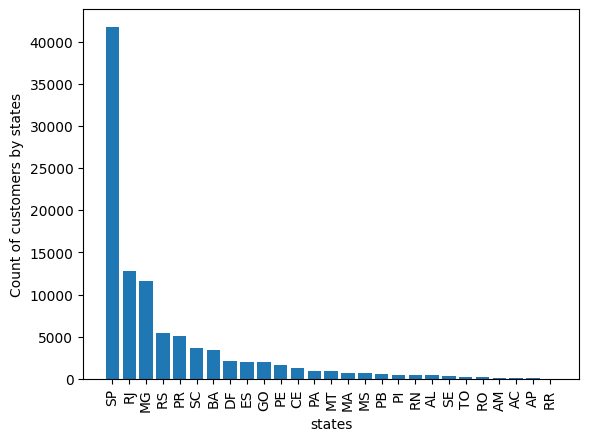

In [9]:
query4 = """select customer_state, count(customer_id) from customers group by customer_state"""
cur.execute(query4);
data4 = cur.fetchall();
df4 = pd.DataFrame(data4, columns= ["state", "customer_count"])
df4 = df4.sort_values(by = "customer_count", ascending = False)
plt.bar(df4["state"], df4["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("Count of customers by states")
plt.show()

In [24]:
query6 = """select month(order_purchase_timestamp) as monthie, count(order_id) from orders group by monthie"""
cur.execute(query6)
data6 = cur.fetchall()
data6

[(10, 4959),
 (7, 10318),
 (8, 10843),
 (11, 7544),
 (2, 8508),
 (4, 9343),
 (5, 10573),
 (1, 8069),
 (6, 9412),
 (3, 9893),
 (12, 5674),
 (9, 4305)]

In [26]:
query7 = """select distinct customer_city from customers, avg(*) as a join orders on customers.customer_id=orders.customer_id join order_details on orders.order_id=order_items.order_id group by """
cur.execute(query7);
data7 = cur.fetchall();
data7

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo